<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

# Impacto económico del índice de paz en México

In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datos/indice_paz_mex_impacto-economico_2020(2).csv')
df.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8


In [4]:
df['Impacto_economico_per_capita_de_la_violencia'] = df['Impacto_economico_per_capita_de_la_violencia'].replace(regex={',': '.'}).astype(float)
#df['Impacto_economico_per_capita_de_la_violencia'] = df['Impacto_economico_per_capita_de_la_violencia'].astype(float)
df.dtypes



Estados                                          object
Homicidio                                       float64
Delitos_con_violencia                           float64
Delitos_con_armas_fuego                         float64
Delincuencia_organizada                         float64
Carcel_Sin_sentencia                            float64
Impacto_economico_de_la_violencia               float64
Impacto_economico_per_capita_de_la_violencia    float64
porcen_pib                                      float64
dtype: object

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


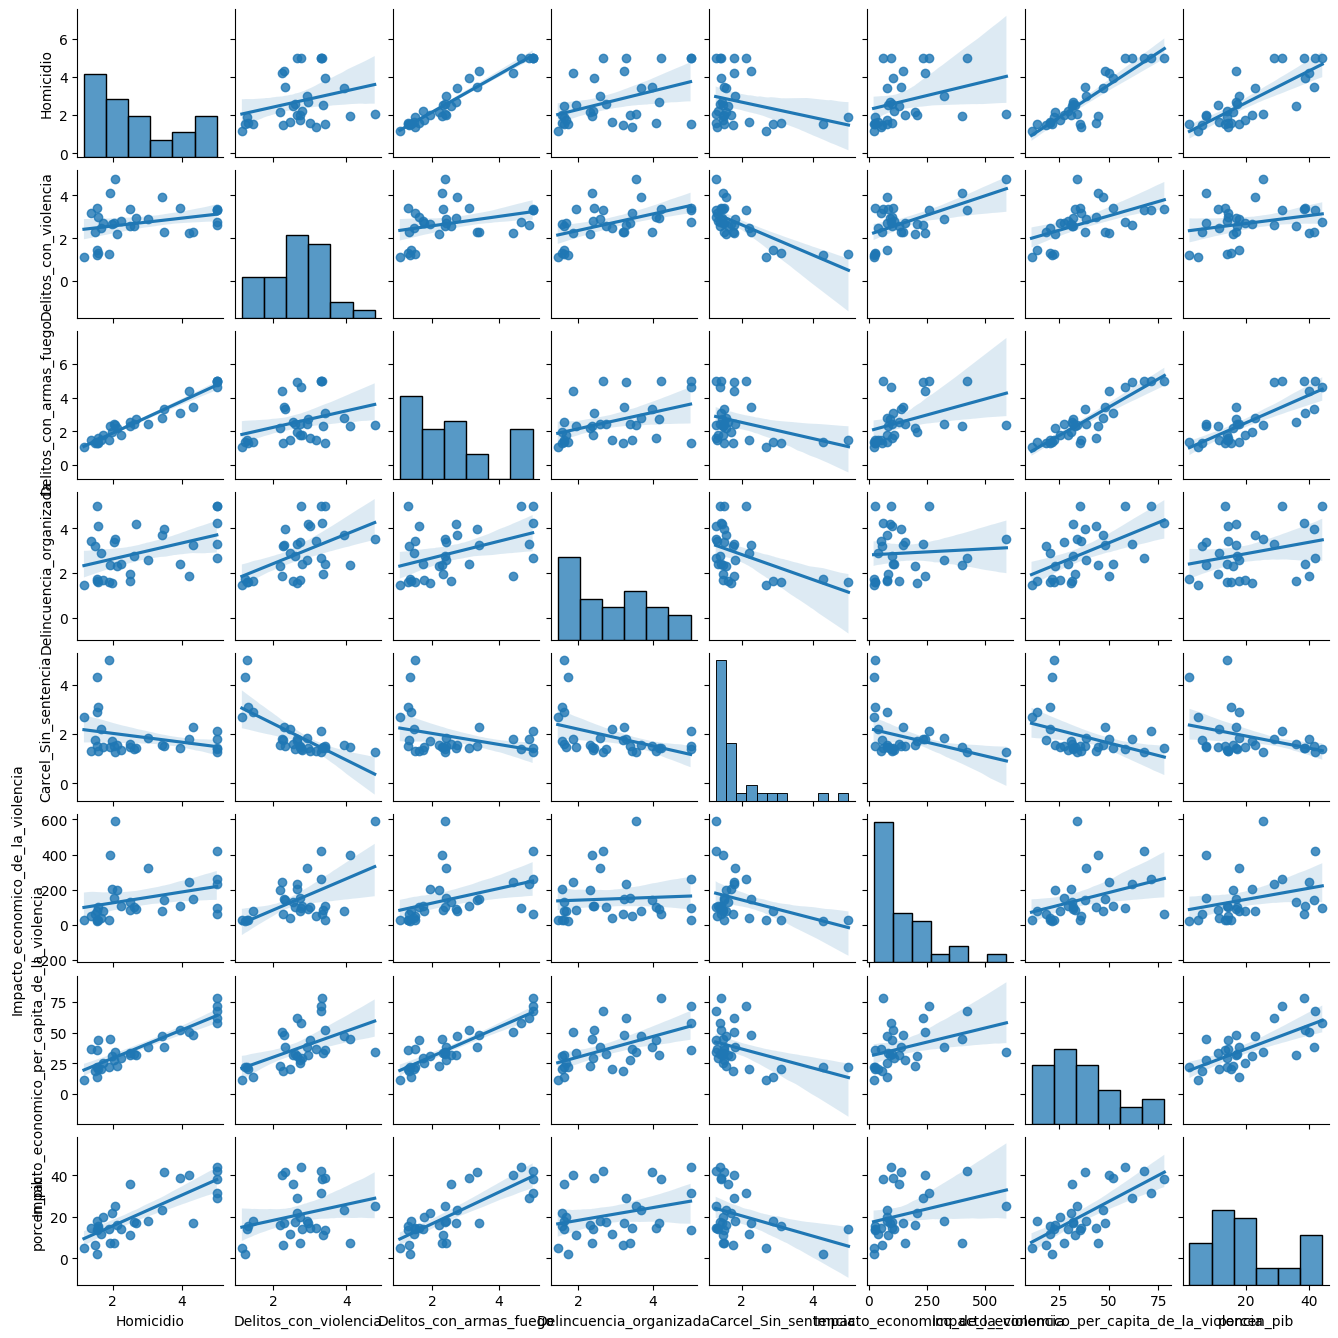

In [5]:
sns.pairplot(df, kind = "reg", height = 1.7, aspect = 1)
plt.show()

# Normalización de los datos

In [6]:
features = [ 'Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib']

In [7]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])
df_standardized

array([[-1.06724887e+00,  5.53283611e-01, -8.75468305e-01,
         4.98800656e-01, -6.92702647e-01, -7.33802550e-01,
        -7.62228423e-02, -5.40888350e-01],
       [ 1.79847363e+00,  7.07991648e-01,  1.95465401e+00,
         1.94985711e+00,  2.53284131e-01,  8.63323975e-01,
         2.05803944e+00,  8.85399883e-01],
       [-9.20491057e-01,  8.45909665e-01, -1.04962968e+00,
         1.94985711e+00, -4.70048225e-01, -9.11431933e-01,
        -1.00256373e-01, -6.33177589e-01],
       [-9.37060488e-01, -1.77813052e+00, -9.92382190e-01,
        -1.06926162e+00,  2.82971387e+00, -9.66796935e-01,
        -9.60983679e-01, -1.57284984e+00],
       [-9.28381262e-01, -1.51308807e+00, -9.70612018e-01,
        -1.15586435e+00,  1.15332635e+00, -5.27721708e-01,
        -1.43323953e+00, -2.64020634e-01],
       [ 1.79847363e+00, -7.75414070e-02,  1.86918593e+00,
         3.74424389e-01, -1.29587230e-01,  6.65701675e-01,
         1.46022807e+00,  6.75651613e-01],
       [-9.67043267e-01, -5.176797

(array([5., 7., 5., 4., 1., 1., 1., 2., 1., 5.]),
 array([-1.225842  , -0.92341043, -0.62097887, -0.31854731, -0.01611574,
         0.28631582,  0.58874738,  0.89117894,  1.19361051,  1.49604207,
         1.79847363]),
 <BarContainer object of 10 artists>)

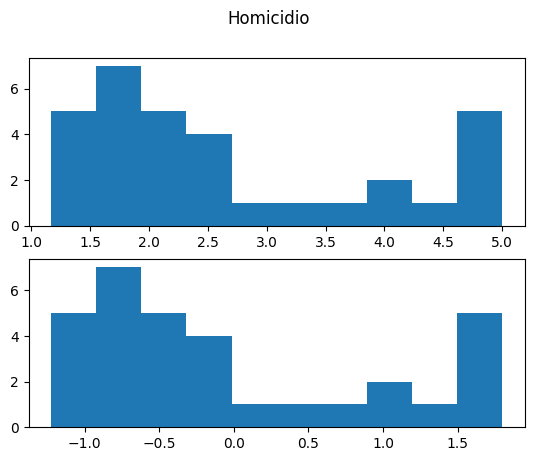

In [8]:
#Comparación antes y despues de la normalización (re-escalamiento)
Murder_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Homicidio')
ax1.hist(df['Homicidio'])
ax2.hist( Murder_list)

In [9]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)
df.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,36.158,14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,71.413,31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,35.761,13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,21.543,2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,13.742,17.8


# Separación de los datos en grupo 

In [10]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


256.00000000000006

# Método del codo 

In [11]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [12]:
wcss

[256.00000000000006,
 155.82285895528938,
 103.45643753957786,
 83.44743240700909,
 68.50238498074023,
 56.556277886168054,
 50.7796510398388,
 45.2709940514826,
 40.798675581171274,
 35.50374824860806,
 32.55218677147495,
 28.66228175558624]

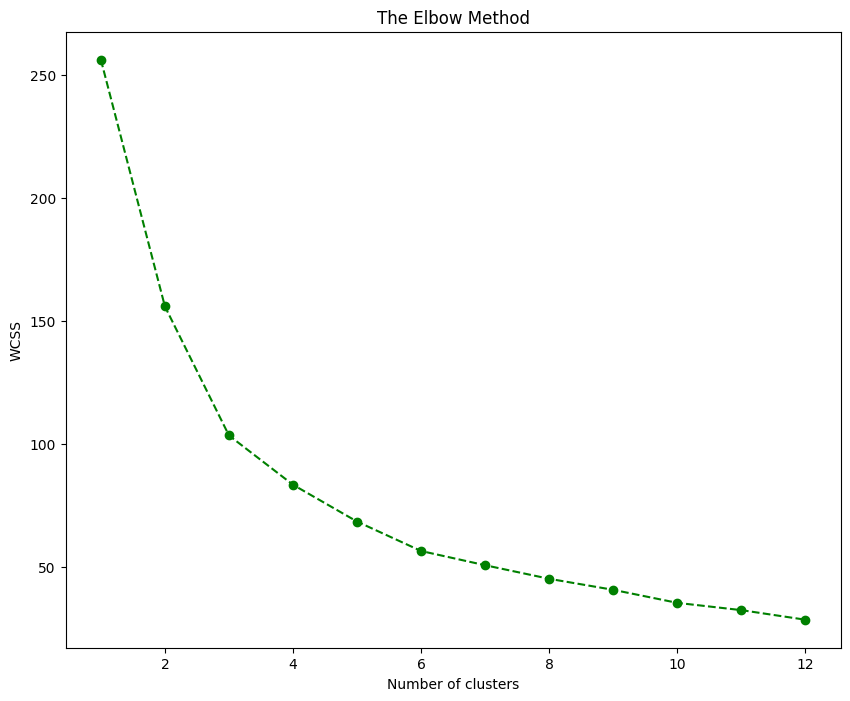

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Método Silhoutee

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(df_standardized, kmeans.labels_)

0.20490943727574784

In [15]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++').fit(df_standardized) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

array([0.34171579, 0.36410754, 0.37561534, 0.31701376, 0.25757711,
       0.26255086, 0.27817265, 0.26645124, 0.23487609, 0.22168   ,
       0.23579187])

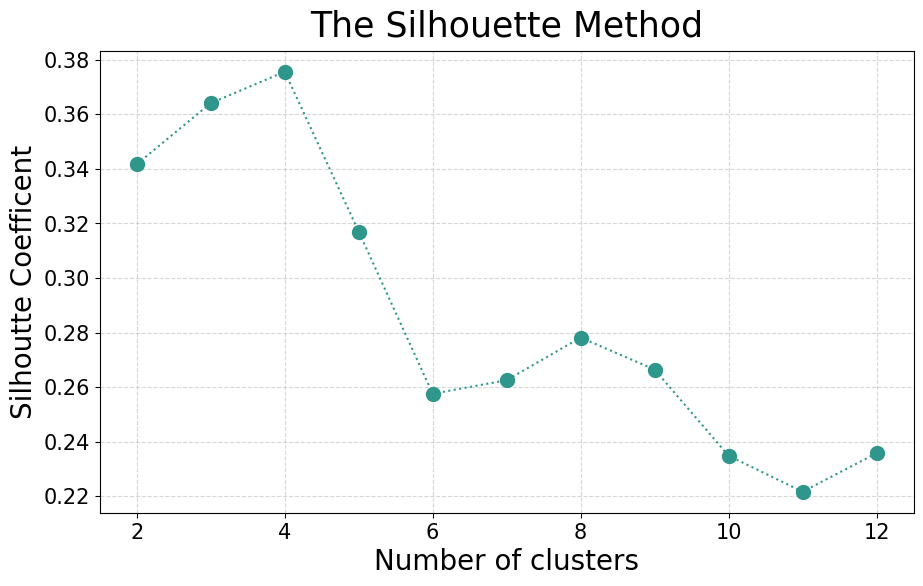

In [16]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [17]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.3756153425771993
El número óptimo de clusters es: 4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


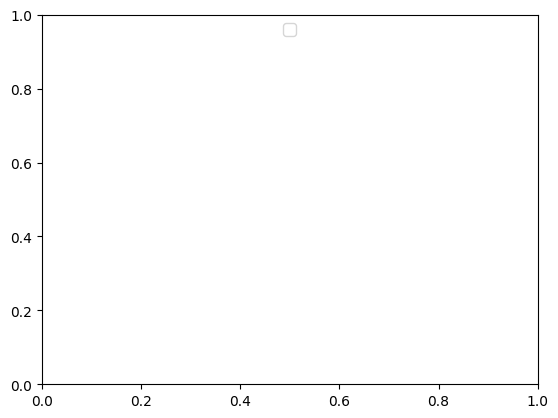

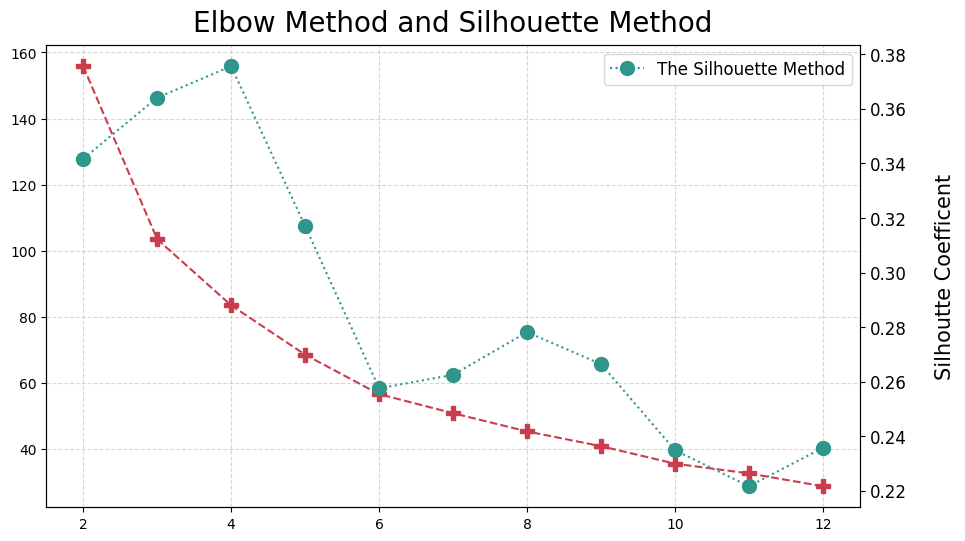

In [18]:
#clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})

fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of
# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()

# Analisis de resultados

In [19]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 3, 2, 0, 0, 3, 2, 3, 2, 3, 3, 2, 1, 1, 1, 3, 3, 0, 2, 2, 2, 2,
       1, 2, 2, 3, 2, 2, 0, 2, 0, 3])

In [20]:
df['cluster'] = y_kmeans + 1
df.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,cluster
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,36.158,14.5,3
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,71.413,31.5,4
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,35.761,13.4,3
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,21.543,2.2,1
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,13.742,17.8,1


In [21]:
df.columns

Index(['Estados', 'Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib',
       'cluster'],
      dtype='object')

<Axes: xlabel='Homicidio', ylabel='Delitos_con_violencia'>

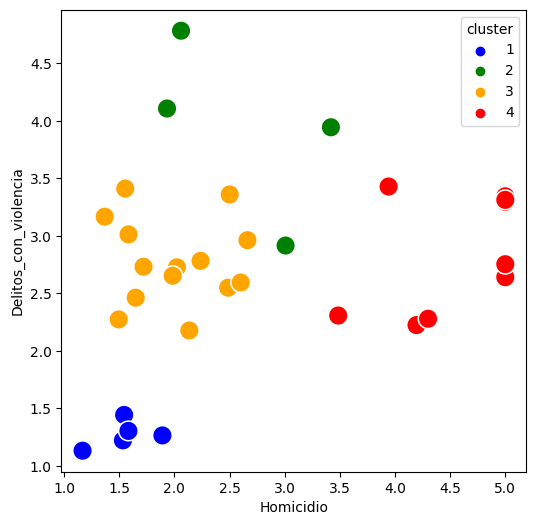

In [22]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Homicidio', y = 'Delitos_con_violencia', hue='cluster',  
                palette=['blue','green','orange','red'] , data=df, s=200)

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

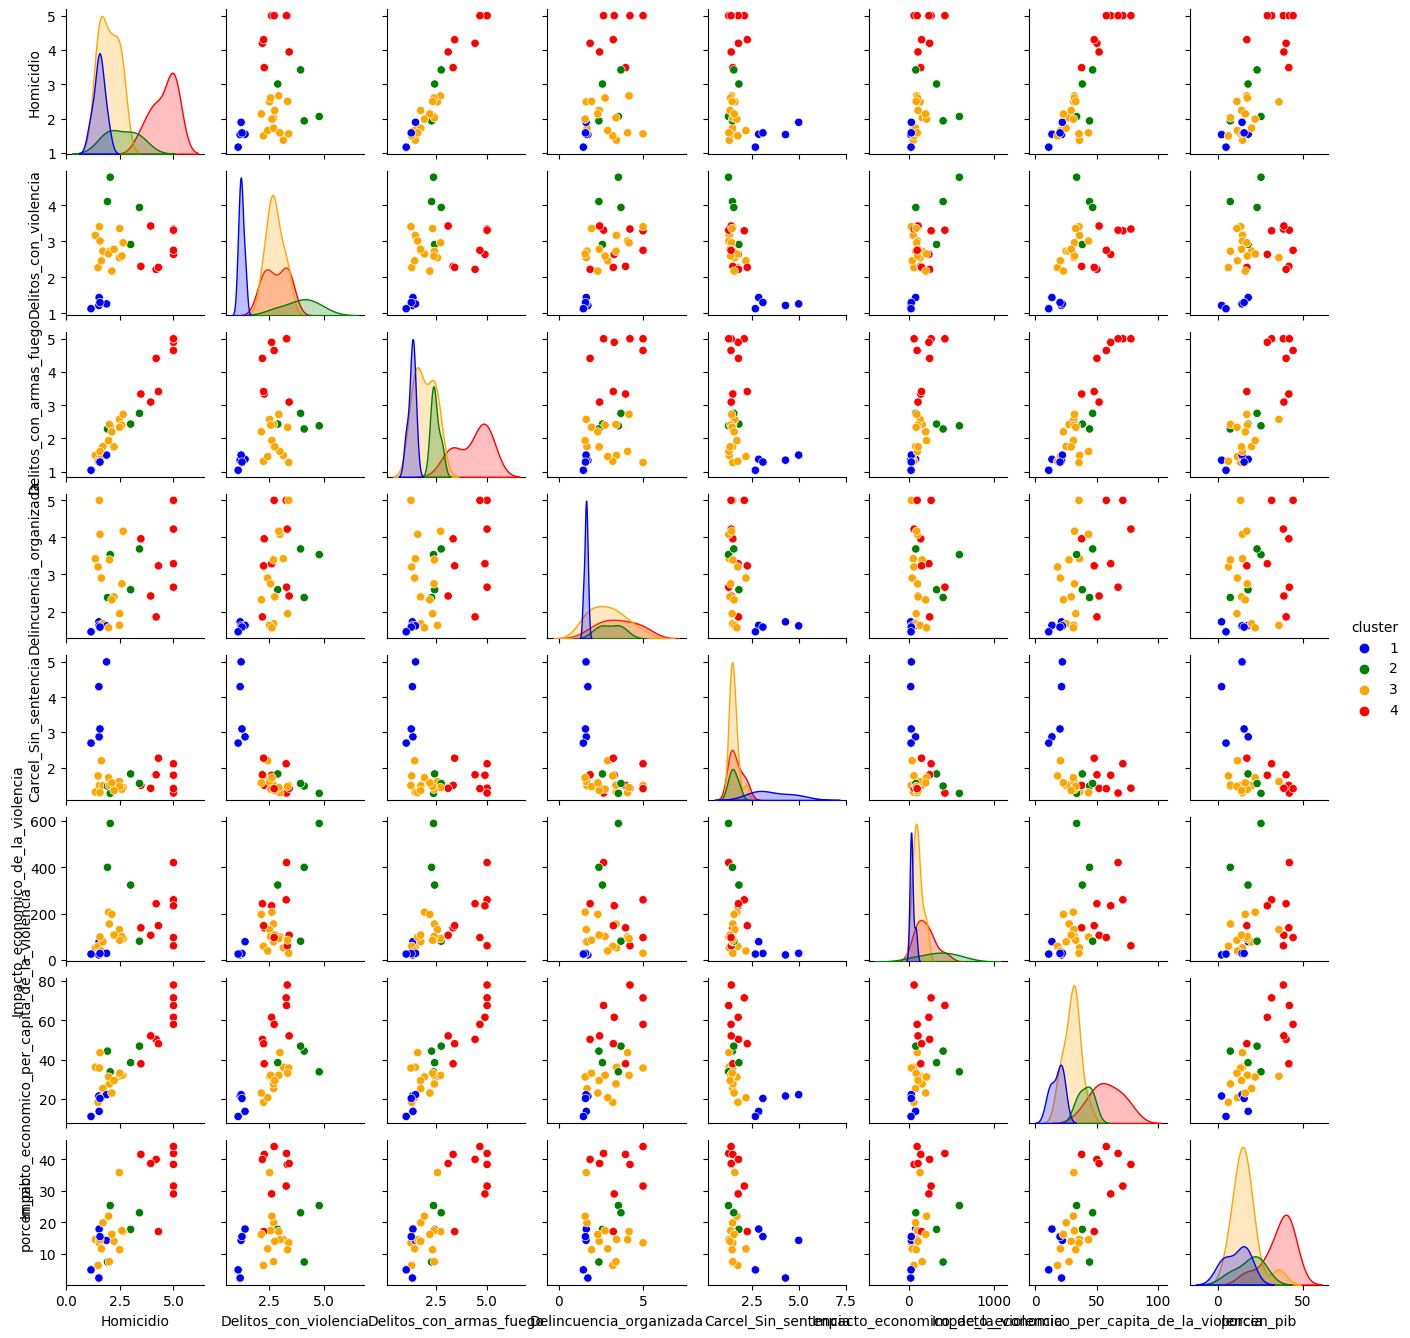

In [23]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df, hue="cluster",  palette=['blue','green','orange','red'],height=1.7 , aspect=1)
plt.show()

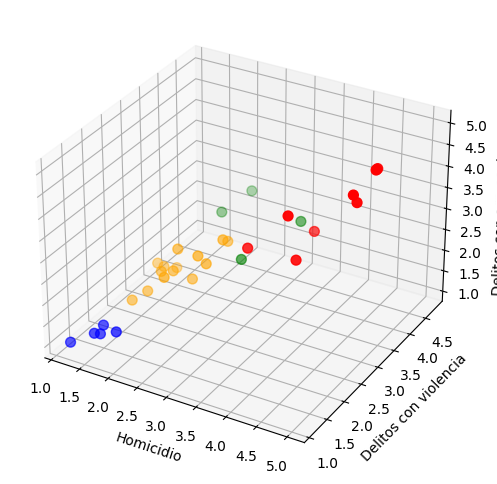

In [24]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Homicidio']
y = df['Delitos_con_violencia']
z = df['Delitos_con_armas_fuego']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Homicidio')
ax.set_ylabel('Delitos con violencia')
ax.set_zlabel('Delitos con armas de fuego')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [54]:
# Se define un dataframe para mostrar la informacion en un mapa

df2 = pd.read_csv('datos/estados_id.csv')
df2.head()

df['IDNAME'] = df2['IDNAME']
df_map  = df
df_map.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,cluster,IDNAME
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,36.158,14.5,3,AS
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,71.413,31.5,4,BC
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,35.761,13.4,3,BS
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,21.543,2.2,1,CC
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,13.742,17.8,1,DF


In [61]:
estados_geo = 'datos/estadosGEO_mx.json'


In [66]:
# Librería Python que permite crear mapas interactivos 
import folium
map = folium.Map(location=[26, -100], tiles='cartodbpositron',zoom_start=4)

In [67]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['IDNAME', 'cluster'],
             key_on='feature.id',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map)
map

# Conclusiones

Grupo 1 (azul) : Se ecuentran en el sur del país y cuentan con altos índices de homicidios
Grupo 4 (varde) : Se encuentra en el centro del pais y cuentan con los índices promedio
Grupo 4 (anarnjado-rosa) : Se encuentra en el centro-norte del pais y cuentan con los índices mínimos de delitos
Grupo 4 (rojo) : Se encuentra en el norte del pais y cuentan con los índices más altos de delincuencia y delitos